<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

chrome://settings/content/cookies

NOTE: Make sure third party cookies are not blocked.

In [45]:
#from google.colab import files
#uploaded = files.upload()
#import io
#df = pd.read_csv(io.BytesIO(uploaded["Employee-attrition.csv"]))
df = pd.read_csv("Employee_updated.csv")


In [20]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/03/1954,8/28/1989,1/01/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1319,12/31/2006 0:00,1/03/1957,8/28/1989,1/01/1900,49,17,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
2,1320,12/31/2006 0:00,1/02/1955,8/28/1989,1/01/1900,51,17,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
3,1321,12/31/2006 0:00,1/02/1959,8/28/1989,1/01/1900,47,17,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
4,1322,12/31/2006 0:00,1/09/1958,8/31/1989,1/01/1900,48,17,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE


In [21]:
df.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
4440,6627,12/31/2006 0:00,10/23/1981,12/24/2006,1/01/1900,25,0,Burnaby,Dairy,Dairy Person,5,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4441,6628,12/31/2006 0:00,10/22/1981,12/24/2006,1/01/1900,25,0,Quesnel,Customer Service,Cashier,28,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4442,6629,12/31/2006 0:00,10/25/1981,12/26/2006,1/01/1900,25,0,Vancouver,Processed Foods,Shelf Stocker,43,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4443,6630,12/31/2006 0:00,10/29/1981,12/28/2006,1/01/1900,25,0,Aldergrove,Dairy,Dairy Person,2,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,STORES
4444,6631,12/31/2006 0:00,11/05/1981,12/31/2006,11/05/2011,25,0,Kelowna,Dairy,Dairy Person,16,F,Female,Not Applicable,Not Applicable,2006,ACTIVE,STORES


# Accessing the main DataFrame components

In [22]:
columns = df.columns
index = df.index
data = df.values

In [23]:
columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [24]:
index

RangeIndex(start=0, stop=4445, step=1)

In [25]:
data

array([[1318, '12/31/2006 0:00', '1/03/1954', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       [1319, '12/31/2006 0:00', '1/03/1957', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       [1320, '12/31/2006 0:00', '1/02/1955', ..., 2006, 'ACTIVE',
        'HEADOFFICE'],
       ...,
       [6629, '12/31/2006 0:00', '10/25/1981', ..., 2006, 'ACTIVE',
        'STORES'],
       [6630, '12/31/2006 0:00', '10/29/1981', ..., 2006, 'ACTIVE',
        'STORES'],
       [6631, '12/31/2006 0:00', '11/05/1981', ..., 2006, 'ACTIVE',
        'STORES']], dtype=object)

# 1. Understanding Data Types

#### 1.A Find Shape of Data Frame

In [26]:
# A:
df.shape

(4445, 18)

#### 1.B Find Data Tyeps of Data Frame

In [14]:
# A:
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

#### 1.C Find Number of Data Types in a Data Frame



```
Expected Output:
int64      5
object    13
dtype: int64
```



In [28]:
df.dtypes.value_counts()

object    13
int64      5
dtype: int64

#### 1.D Use Info

Use info and explore difference.

In [29]:
# A:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4445 entries, 0 to 4444
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           4445 non-null   int64 
 1   recorddate_key       4445 non-null   object
 2   birthdate_key        4445 non-null   object
 3   orighiredate_key     4445 non-null   object
 4   terminationdate_key  4445 non-null   object
 5   age                  4445 non-null   int64 
 6   length_of_service    4445 non-null   int64 
 7   city_name            4445 non-null   object
 8   department_name      4445 non-null   object
 9   job_title            4445 non-null   object
 10  store_name           4445 non-null   int64 
 11  gender_short         4445 non-null   object
 12  gender_full          4445 non-null   object
 13  termreason_desc      4445 non-null   object
 14  termtype_desc        4445 non-null   object
 15  STATUS_YEAR          4445 non-null   int64 
 16  STATUS

# 2. Selecting Column in Data Frame

#### 2.A Check Values of Job_Title column

In [30]:
# A:
df['job_title']

0                      CEO
1                VP Stores
2            Legal Counsel
3       VP Human Resources
4               VP Finance
               ...        
4440          Dairy Person
4441               Cashier
4442         Shelf Stocker
4443          Dairy Person
4444          Dairy Person
Name: job_title, Length: 4445, dtype: object

#### 2.B Find How Many Rows Are in Each Job Title



```
# Expected Output
Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
.
.
.
```



In [31]:
# A:
df['job_title'].value_counts()

Meat Cutter                        1097
Produce Clerk                       945
Baker                               810
Dairy Person                        716
Shelf Stocker                       308
Cashier                             289
Store Manager                        35
Meats Manager                        34
Bakery Manager                       33
Produce Manager                      33
Processed Foods Manager              32
Customer Service Manager             32
Recruiter                             8
HRIS Analyst                          8
Labor Relations Analyst               5
Systems Analyst                       5
Benefits Admin                        5
Accounting Clerk                      5
Accounts Receiveable Clerk            4
Trainer                               4
Auditor                               3
Compensation Analyst                  3
Corporate Lawyer                      3
Accounts Payable Clerk                3
Investment Analyst                    3


#### 2.C [BONUS] Write A Function to Row Count



```
def row_count(column_name):
    number_of_rows = 0
    return number_of_rows
```



#### 2.D Describe 'Age'

Find count,  mean,  std, min, max of column 'age'

In [32]:
# A:
df['age'].describe()

count    4445.000000
mean       43.259843
std        11.021406
min        25.000000
25%        34.000000
50%        43.000000
75%        52.000000
max        64.000000
Name: age, dtype: float64

##### 2.E [BONUS] Describe 'All Numeric Columns of Data Frame

Find count, mean, std, min, max of of all columns of dataframe

In [33]:
# A:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,4445.000000,4445.000000,4445.000000,4445.000000,4445.0
mean,4215.734983,43.259843,8.213048,27.137683,2006.0
std,1500.403587,11.021406,4.788019,13.168213,0.0
min,1318.000000,25.000000,0.000000,1.000000,2006.0
25%,2980.000000,34.000000,4.000000,17.000000,2006.0
50%,4355.000000,43.000000,8.000000,28.000000,2006.0
75%,5506.000000,52.000000,12.000000,41.000000,2006.0
max,6631.000000,64.000000,17.000000,46.000000,2006.0


# 3. Making The Index Meaningful

In [47]:
# A:
df_new=df.set_index('EmployeeID')

#### 3.A Find A Specifc Row Using Index

In [48]:
# A:
df.loc[0]

EmployeeID                        1318
recorddate_key         12/31/2006 0:00
birthdate_key                1/03/1954
orighiredate_key             8/28/1989
terminationdate_key          1/01/1900
age                                 52
length_of_service                   17
city_name                    Vancouver
department_name              Executive
job_title                          CEO
store_name                          35
gender_short                         M
gender_full                       Male
termreason_desc         Not Applicable
termtype_desc           Not Applicable
STATUS_YEAR                       2006
STATUS                          ACTIVE
BUSINESS_UNIT               HEADOFFICE
Name: 0, dtype: object

In [52]:
df1 = pd.read_csv('sales_train.csv')

In [53]:
df1.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [58]:
df1.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


#### 3.B Sort Data Frame using Index

In [66]:
df1['date'].value_counts()

28.12.2013    9434
29.12.2013    9335
30.12.2014    9324
30.12.2013    9138
31.12.2014    8347
              ... 
14.05.2015    1174
28.04.2015    1154
06.10.2015    1152
13.05.2015    1128
12.05.2015    1123
Name: date, Length: 1034, dtype: int64

In [2]:
# A:
df3 = pd.read_csv('FL_insurance_sample.csv')

In [3]:
df3.head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


In [4]:
df3.describe()

,policyID,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,point_granularity
count,36634.000000,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,36634.000000,36634.000000,36634.000000,36634.000000,36634.000000
mean,548661.937189,7.314780e+05,2.074348e+06,6.646009e+05,9.911724e+05,2.172875e+06,2.571004e+06,7.787908e+02,7.037985e+03,192.453210,26.483594,28.087477,-81.903565,1.640907
std,259912.926494,1.752300e+07,1.964150e+07,1.746114e+07,1.767178e+07,2.015015e+07,2.036777e+07,4.787979e+04,9.582593e+04,8037.713716,4702.740932,1.647734,1.809066,1.070561
min,100074.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,7.337000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,24.547514,-87.447290,1.000000
25%,323647.750000,0.000000e+00,4.248106e+04,0.000000e+00,0.000000e+00,4.562415e+04,5.401351e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,26.471996,-82.439331,1.000000
50%,548525.000000,0.000000e+00,1.926911e+05,0.000000e+00,0.000000e+00,2.021051e+05,2.416310e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,28.057077,-81.585700,1.000000
75%,774252.000000,0.000000e+00,9.163381e+05,0.000000e+00,5.741010e+04,9.465821e+05,1.128871e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,29.623005,-80.372910,3.000000
max,999971.000000,2.160000e+09,2.160000e+09,2.160000e+09,2.160000e+09,2.160000e+09,1.701000e+09,6.273765e+06,7.380000e+06,450000.000000,900000.000000,30.989820,-80.033257,7.000000


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36634 entries, 0 to 36633
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   policyID            36634 non-null  int64  
 1   statecode           36634 non-null  object 
 2   county              36634 non-null  object 
 3   eq_site_limit       36634 non-null  float64
 4   hu_site_limit       36634 non-null  float64
 5   fl_site_limit       36634 non-null  float64
 6   fr_site_limit       36634 non-null  float64
 7   tiv_2011            36634 non-null  float64
 8   tiv_2012            36634 non-null  float64
 9   eq_site_deductible  36634 non-null  float64
 10  hu_site_deductible  36634 non-null  float64
 11  fl_site_deductible  36634 non-null  float64
 12  fr_site_deductible  36634 non-null  int64  
 13  point_latitude      36634 non-null  float64
 14  point_longitude     36634 non-null  float64
 15  line                36634 non-null  object 
 16  cons

In [6]:
max(df3['policyID'].value_counts())

1

In [7]:
df3_new = df3.set_index('policyID')

In [8]:
df3_new.head()

,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
policyID,,,,,,,,,,,,,,,,,
119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


In [9]:
df3_new.loc[119736]

statecode                      FL
county                CLAY COUNTY
eq_site_limit              498960
hu_site_limit              498960
fl_site_limit              498960
fr_site_limit              498960
tiv_2011                   498960
tiv_2012                   792149
eq_site_deductible              0
hu_site_deductible         9979.2
fl_site_deductible              0
fr_site_deductible              0
point_latitude            30.1023
point_longitude          -81.7118
line                  Residential
construction              Masonry
point_granularity               1
Name: 119736, dtype: object

In [10]:
df3_new['county'][df3_new['construction']=='Masonry'].value_counts()

MIAMI DADE COUNTY    1326
BROWARD COUNTY        740
PALM BEACH COUNTY     655
DUVAL COUNTY          577
PINELLAS COUNTY       573
                     ... 
GILCHRIST COUNTY        5
LIBERTY COUNTY          4
BRADFORD COUNTY         3
UNION COUNTY            3
HAMILTON COUNTY         1
Name: county, Length: 64, dtype: int64

In [11]:
df3_new['construction'].value_counts()

Wood                   21581
Masonry                 9257
Reinforced Masonry      4225
Reinforced Concrete     1299
Steel Frame              272
Name: construction, dtype: int64

In [25]:
max(df3_new['eq_site_limit'][df3_new['construction']=='Wood'])
print(np.sum(df3_new['eq_site_limit']>0.5 * 1e9))
df3_red = df3_new[df3_new['eq_site_limit']<0.5*1e9]
print(df3_red.shape)
print(df3_new.shape)

6
(36628, 17)
(36634, 17)


In [16]:
import seaborn as sns

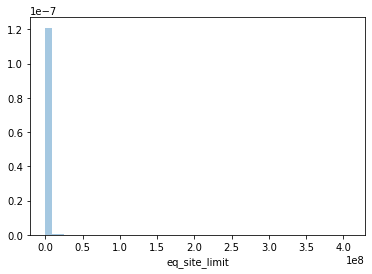

In [26]:
sns.distplot(df3_red['eq_site_limit'])

(array([18393.,   521.,   749.,   468.,   343.,   263.,   265.,   187.,
          182.,   210.]),
 array([     0.  ,  35997.39,  71994.78, 107992.17, 143989.56, 179986.95,
        215984.34, 251981.73, 287979.12, 323976.51, 359973.9 ]),
 <a list of 10 Patch objects>)

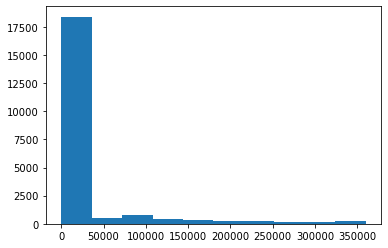

In [79]:
plt.hist(df3_new['eq_site_limit'][df3_new['construction']=='Wood'])

In [83]:
df3_new.head()

,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
policyID,,,,,,,,,,,,,,,,,
119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


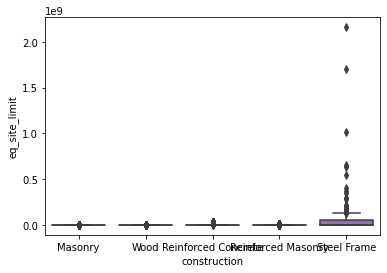

In [19]:
sns.boxplot(x='construction', y='eq_site_limit',data=df3_new)

In [62]:
df2 = pd.read_csv('business-price-indexes-june-2020-quarter-csv-corrected.csv')

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67304 entries, 0 to 67303
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  67304 non-null  object 
 1   Period            67304 non-null  float64
 2   Data_value        66904 non-null  float64
 3   STATUS            67304 non-null  object 
 4   UNITS             67304 non-null  object 
 5   Subject           67304 non-null  object 
 6   Group             67304 non-null  object 
 7   Series_title_1    67304 non-null  object 
 8   Series_title_2    915 non-null    object 
 9   Series_title_3    0 non-null      float64
 10  Series_title_4    0 non-null      float64
 11  Series_title_5    0 non-null      float64
dtypes: float64(5), object(7)
memory usage: 6.2+ MB


In [64]:
df2.head()

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,CEPQ.S2371,1996.12,899.0,FINAL,Index,Capital Goods Price Index - CEP,"Price Index by Item - Plant, Machinery and Equ...",Glass and glass products,NaN,NaN,NaN,NaN
1,CEPQ.S2371,1997.03,884.0,FINAL,Index,Capital Goods Price Index - CEP,"Price Index by Item - Plant, Machinery and Equ...",Glass and glass products,NaN,NaN,NaN,NaN
2,CEPQ.S2371,1997.06,925.0,FINAL,Index,Capital Goods Price Index - CEP,"Price Index by Item - Plant, Machinery and Equ...",Glass and glass products,NaN,NaN,NaN,NaN
3,CEPQ.S2371,1997.09,932.0,FINAL,Index,Capital Goods Price Index - CEP,"Price Index by Item - Plant, Machinery and Equ...",Glass and glass products,NaN,NaN,NaN,NaN
4,CEPQ.S2371,1997.12,929.0,FINAL,Index,Capital Goods Price Index - CEP,"Price Index by Item - Plant, Machinery and Equ...",Glass and glass products,NaN,NaN,NaN,NaN


In [13]:
df4 = pd.read_csv('bank-full.csv')

In [15]:
df4.tail()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."
45210,"37;""entrepreneur"";""married"";""secondary"";""no"";2..."


#### 3.C [BONUS] Sort Data Frame using Age

In [0]:
# A:

#### 3.D [BONUS] Using Sample Select Any Row 

In [0]:
# A:

# 4. Query Data Frame

#### 4.A Find Rows Where Job_Title is CEO

In [0]:
# A:

#### 4.B Group By Age

In [0]:
# A:

# 5. Visualization

#### 5.A Plot Histogram of Age 

In [0]:
# A:

#### 5.B BoxPlot of Age

In [0]:
# A:

#### 5.C Scatterplot of age and length_of_service

In [0]:
# A:

#### 5.D Plot Histogram of store_name

In [0]:
# A:

#### 5.E Print Statistical Summary of Age

In [0]:
# A:



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



